#  cost와 gamma

C(cost) : 정규화 매개변수, 오차에 대한 패널티, C가 작으면 패널티가 커지고 C가 커지면 패널티가 줄어드는 방식, C값을 증가시키면 모델이 좀더 복잡해짐(좀더 자세하게 결정경계를 찾아내는 방식), C값이 작으면 이상치들이 있을 가능성을 크게 잡아서 일반적인 결정 경계를 만들어낸다.

gamma값을 증가시키면 각각의 데이터 포인트가 영향력을 행사하는 거리가 짧아지고 gamma값이 작으면 영향력을 행사하는 거리가 길어진다.

cost와 gamma가 너무 크면 과대적합의 위험이 있고 너무 작으면 과소적합의 위험이 있음

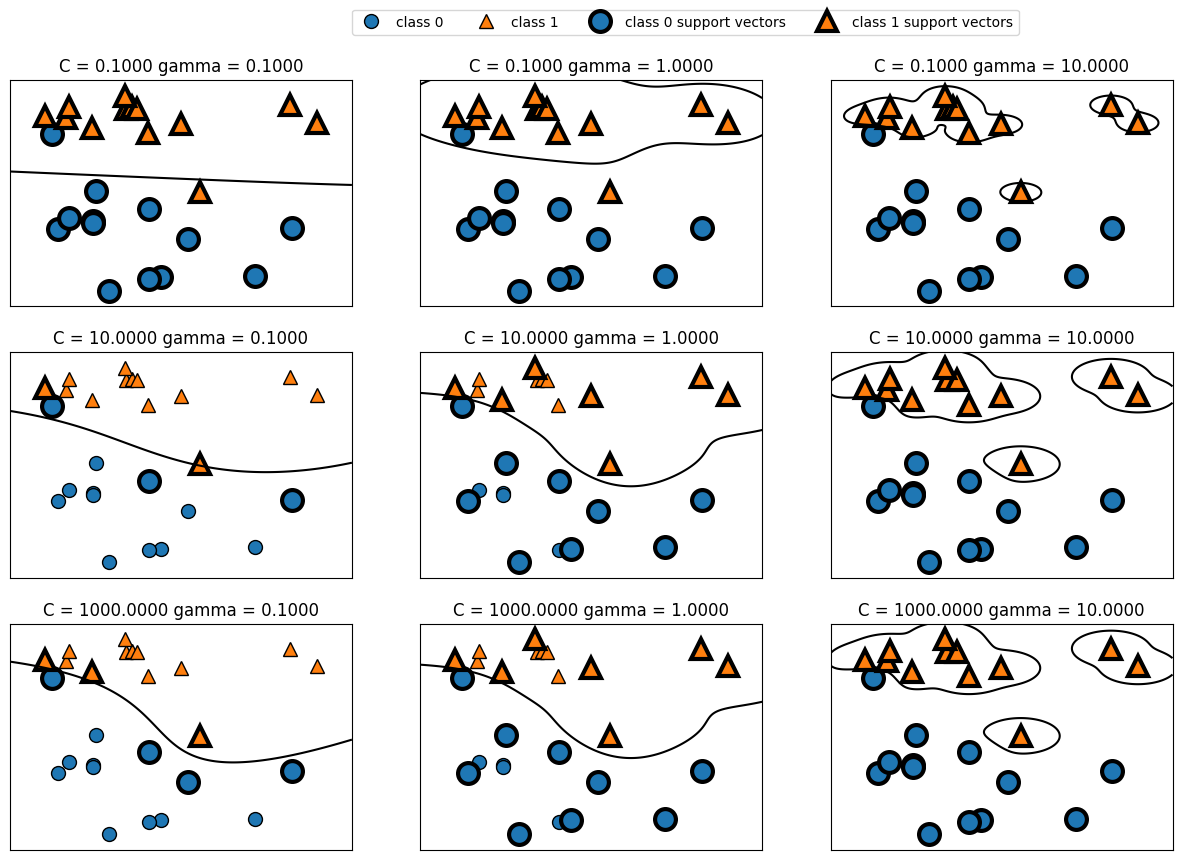

In [1]:
import matplotlib.pyplot as plt
import mglearn

fig, axes = plt.subplots(3, 3, figsize=(15, 10))

# cost : 0.1, 10, 1000
# gamma : 0.1, 1, 10

for ax, C in zip(axes, [-1, 1, 3]):
    for a, gamma in zip(ax, [-1, 0, 1]):        
        mglearn.plots.plot_svm(log_C=C, log_gamma=gamma, ax=a)

#ncol=4 4개의 셀을 합쳐서 범례 표시
axes[0, 0].legend(["class 0", "class 1", "class 0 support vectors", "class 1 support vectors"], ncol=4, loc=(1, 1.2))

# 서포트 벡터와 Cost,gamma

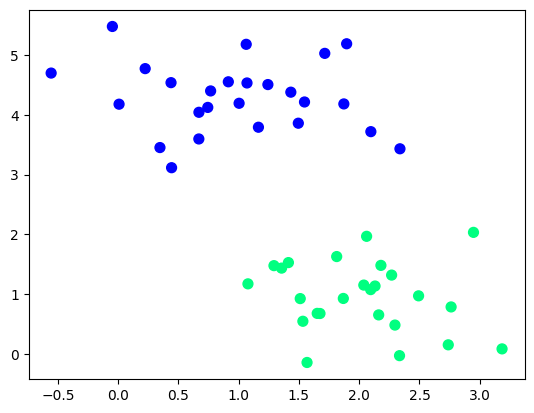

In [2]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

#랜덤 데이터셋, n_samples 샘플개수, centers 중심좌표, cluster_std 클러스터의 표준편차
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.6)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='winter')

(-1.0, 3.5)

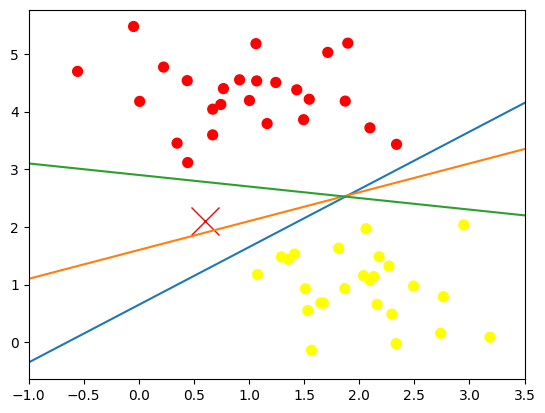

In [3]:
import numpy as np

xfit = np.linspace(-1, 3.5, 10) # -1 ~ 3.5 10등분

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

# X 데이터는 어느 클래스로 분류될까요?
plt.plot([0.6], [2.1], 'x', color='red', markersize=20)

#기울기와 절편에 따라 구분선이 달라짐
for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b)

plt.xlim(-1, 3.5)

In [4]:
from sklearn.svm import SVC

#선형분류 linear, 비선형분류 rbf(기본값)
model = SVC(kernel='linear')

#model = SVC()

model.fit(X, y)

SVC(kernel='linear')

In [5]:
#서포트 벡터의 좌표값

model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

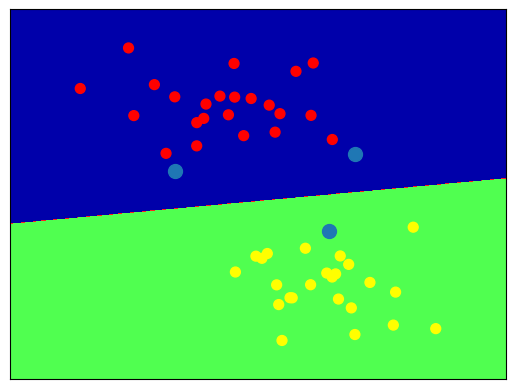

In [6]:
import mglearn

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100)
mglearn.plots.plot_2d_classification(model, X)

In [7]:
a,b = np.meshgrid([10,20],[30,40])

#print(a)
#print(a.ravel()) # 행렬을 1차원 배열로 만드는 함수
#print(a.ravel().T) # 행렬전치, Transposition Arrays and Swapping Axes

c = np.vstack([a.ravel(), b.ravel()]).T
#c = np.vstack([a.ravel(), b.ravel()])

print(c)

[[10 30]
 [20 30]
 [10 40]
 [20 40]]


In [8]:
#reshape 연습

a=np.array([[10,20,30],[40,50,60]])
print(a.shape)

b=a.reshape(3,2)

print(a)
print(b)
print(b.shape)

(2, 3)
[[10 20 30]
 [40 50 60]]
[[10 20]
 [30 40]
 [50 60]]
(3, 2)


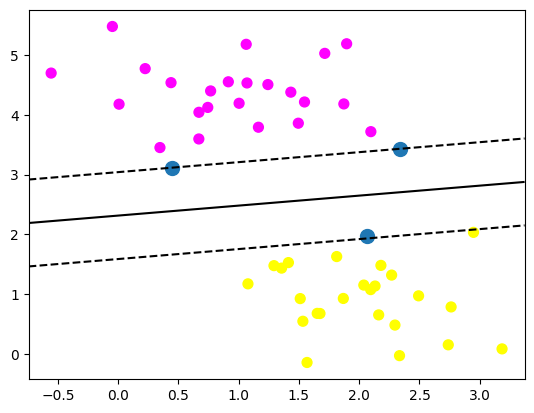

In [9]:
def plot_svc(model,ax=None):

    if ax==None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()  

    # 그래프 그리드
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x) # 정방행렬로 만들고
    xy = np.vstack([X.ravel(), Y.ravel()]).T #1차원으로 만들고 행렬 전치

    #판별함수에 입력하고
    P = model.decision_function(xy).reshape(X.shape)

    # decision boundary와 margins
    # 등고선, 2차원 넘파이 배열
    ax.contour(X, Y, P, levels=[-1, 0, 1], colors='k', linestyles=['--', '-', '--'])

    

    # 서포트 벡터 그리기
    ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100)

    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

#서포트 벡터 표시
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='spring')

plot_svc(model)

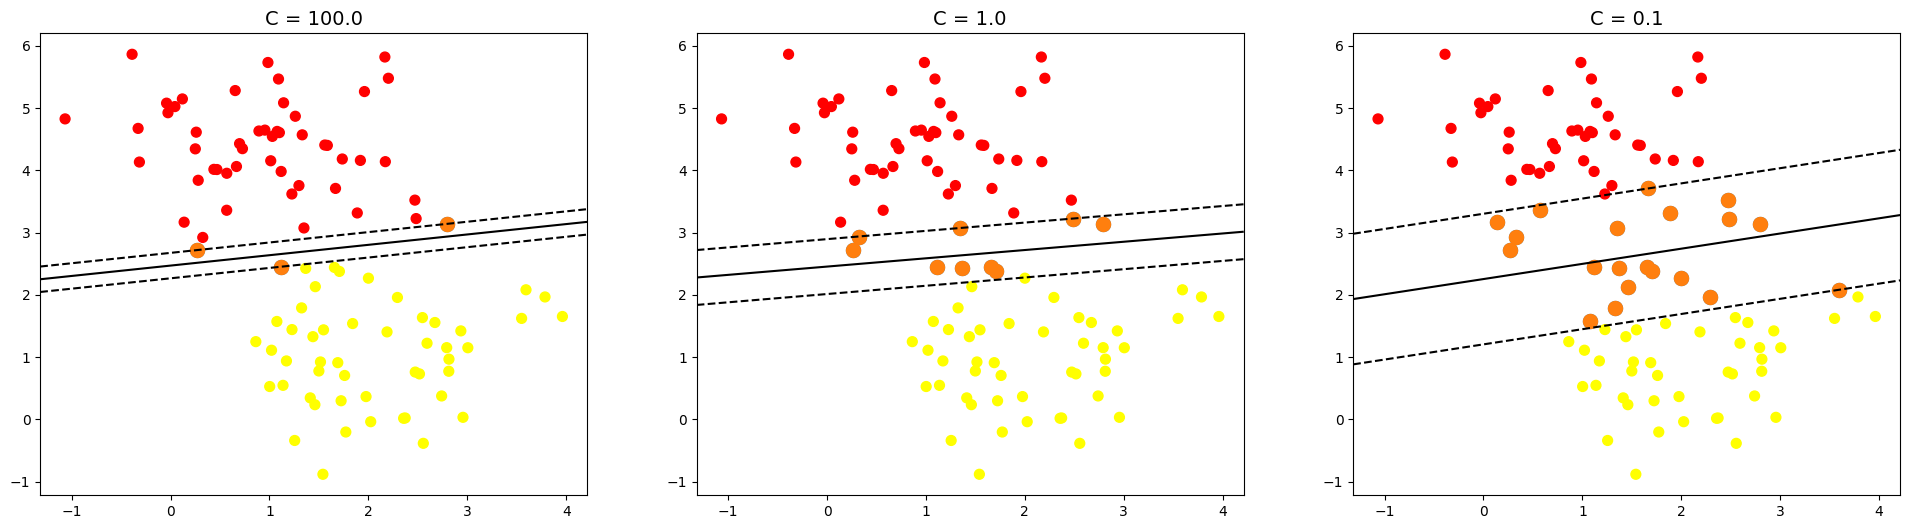

In [10]:
X, y = make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=0.8)

fig, ax = plt.subplots(1, 3, figsize=(24, 6))

for axi, cost in zip(ax, [100, 1, 0.1]):
    model = SVC(kernel='linear', C=cost).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    plot_svc(model, axi)
    # lw : line width
    axi.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=50, lw=4)
    axi.set_title('C = {0:.1f}'.format(cost), size=14)

In [11]:
X, y = make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=0.8)

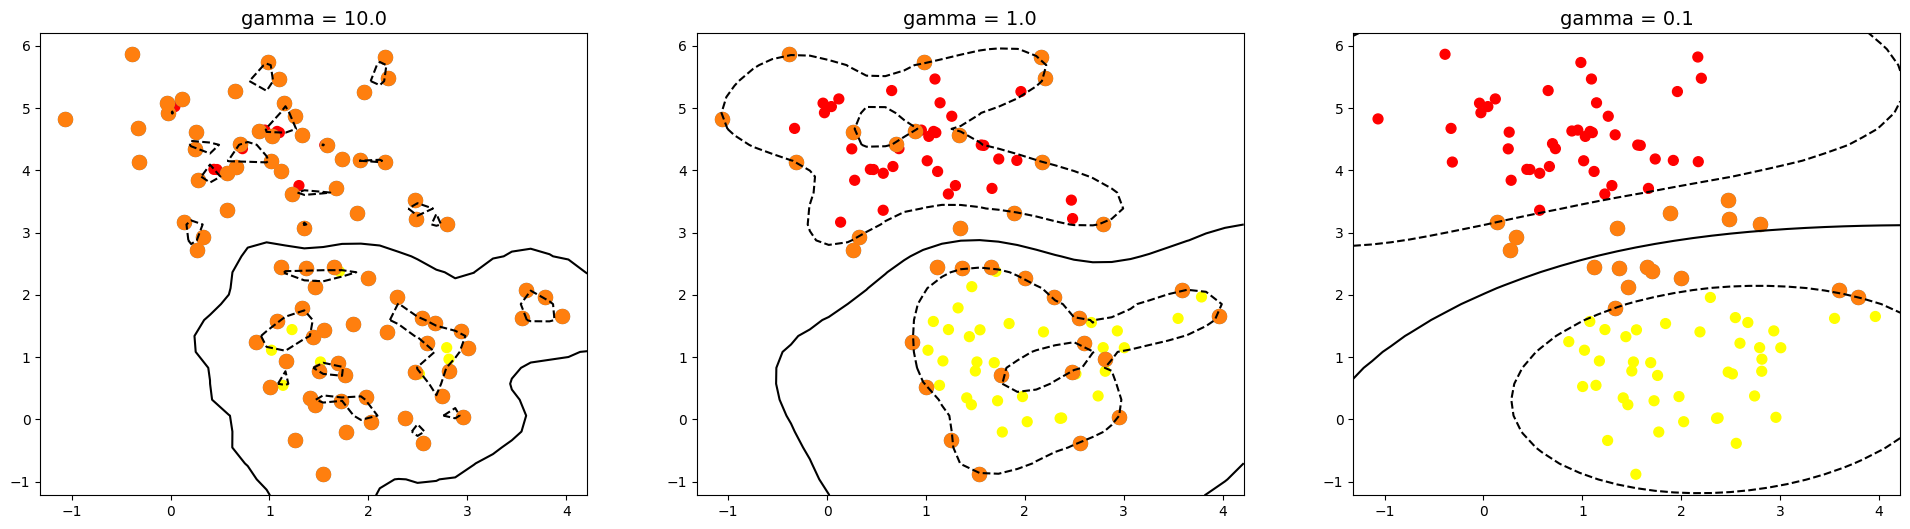

In [13]:
fig, ax = plt.subplots(1, 3, figsize=(24, 6))

for axi, g in zip(ax, [10, 1, 0.1]):
    model = SVC(kernel='rbf',gamma=g).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    plot_svc(model, axi)
    # lw : line width
    axi.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=50, lw=4)
    axi.set_title('gamma = {0:.1f}'.format(g), size=14)